# <span style="color: green;"><center> <u>REGRESSION MODEL USING ZILLOW DATA FINAL REPORT</u></center> 
- By Annie Carter
- Sourced from: CodeUP, Inc and Kaggle's 2017 Zillow Datasources
____________________________________________________________

In [25]:
#python libraries
import pandas as pd
import numpy as np
import os

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Import homemade files
from env import hostname, user, password
import wrangle as w
import explore as e

# Import scikit-learn for split
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Import for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer

# Import for feature selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from scipy.stats import pearsonr, spearmanr

# Import scikit-learn modeling 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

#turn of warnings 
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### PROJECT DESCRIPTION
This project predicts factors contributing to 2017 property tax assessed values for three California counties ( Orange County, Ventura, Los Angeles). The data collected from this project can help with future planning on ways to decrease property tax and improve loyalty to the Zillow brand.

### PROJECT GOALS
* This project goal is to develop an ML Regression model to accurately forecast the assessed values of Single Family Properties by leveraging property attributes. 
* Identify the crucial factors property tax assessed values of single family properties that had a transaction during 2017. 
* Present findings to lead data scientist and other Zillow stakeholders


## DATA DICTIONARY
| Original Name               |   Target     |       Datatype         |       Definition             |
|:---------------------------:|:------------:|:----------------------:|------------------------------|
|  taxvaluedollarcnt          |  tax_value   | 50283 non-null: float64|  target variable            

|      Original Name          |   Renamed    |       Datatype         |     Definition               |
|-----------------------------|--------------|------------------------|------------------------------|
|  bedroomcnt                 |  bedrooms    | 50283 non-null: int64  | # of bedrooms                |
|  bathroomcnt                |  bathrooms   | 50283 non-null: int64  | # of bathrooms               |
|calculatedfinishedsquarefeet |  sqft        | 50283 non-null: int64  | # of square feet             |
|  yearbuilt                  |  year_built  | 50283 non-null: object | year house was built)        |
|  fips                       |  county      | 50283 non-null: object | County house located         |
|  lotsizesquarefeet          |  lot_size    | 50283 non-null: int64  | size of lot                  |
|  longitude                  |  longitude   | 50283 non-null: int64  | longitude line house located |
|  latitude                   |  latitude    | 50283 non-null: int64  | latitude line house located  |

## INITIAL QUESTIONS
1. Does number of bathrooms have a relationship to property tax value?
2. Is there a relationship between square feet and property tax value?
3. Does number of bedrooms have a relationship to property tax value?
4. Does the Lot Size have a significant impact on property tax value?

## <span style="color: green;"><u>EXECUTIVE SUMMARY</u></span>

- The analysis revealed that all features exhibited a correlation/relationship with property tax value, ranging from very weak to moderate, across the three different counties. Square footage showed the strongest regression line among the features.
- Los Angeles County had a higher average of single-family homes with 6+ bedrooms, indicating higher tax values and larger lot sizes. Bedrooms had a lesser impact on property tax value compared to bathrooms. Ventura County had a scarcity of one-bedroom homes, while Orange County showed a comparable distribution to bedrooms and tax value.
- The rejection of null hypotheses for bedrooms, square footage, bathrooms, and lot size provided evidence of a significant relationship with property tax value.
- The best performing models were OLS and Lasso+Lars, with an RMSE of 275,079 and 278,281 respectively, outperforming the baseline. The chosen model for further analysis is Lasso+Lars (alpha = 0.03). Recommendations include conducting Polynomial Regression, creating dummy variables for county-specific models, exploring additional features, aggregating past data, using the IQR method for data cleaning, and excluding variables with high null values.

## <span style="color: green;"><u>AQUISITION AND PREPARATION</u></span>
- Data was acquired from the Codeup, Inc database using Kaggle's 2017 Zillow data.
- The dataset initially consisted of 9 columns and 52,441 rows before any cleaning procedures were applied.
- Each row in the dataset represents a single-family home property ('261' parcelid).

- The data was prepared by performing various steps. Firstly, the columns were renamed to enhance readability. Null values and duplicate rows were dropped. Data types were modified to facilitate exploration and modeling.

- The county information, labeled as "fips," was renamed appropriately. 

- To address skewed data, outliers were removed. For instance, properties with more than 6 bedrooms or bathrooms and prices exceeding 2M were considered outliers. 
- Resulting in 50,282 rows or %95 of original data used to maintain data integrity
- The data was split into training, validation, and testing sets using a 50%, 30%, 20% split, respectively using Random State of 123.

In [26]:
#Data is acquired & prepared so no missed values and outliers removed
df = w.final_wrangle()
df.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,county,lot_size,longitude,latitude
0,4,3,3100,1023282,1998,Orange Cty,4506,-117869207,33634931
1,2,1,1465,464000,1967,Ventura,12647,-119281531,34449266


In [27]:
# Datasets split 
train, validate, test = w.split_zillow(df)

Train shape: (30169, 9)
Validate shape: (10057, 9)
Test shape: (10057, 9)


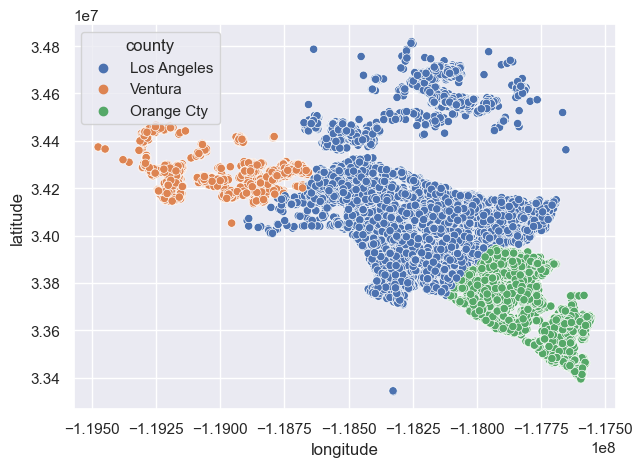

In [28]:
#The California county single family home transactions in 2017 based on latitude and longitude  
e.california_county(train)

## <span style="color: green;"><u>EXPLORATORY ANALYSIS</u>

### <div style="text-align: center;"><span style="color: green;"> 1. Does number of bathrooms have a relationship to property tax value?

#### "The box plot illustrates the distribution of the number of bathrooms in single-family homes (SFH) across different counties, with respect to the corresponding tax values for each county."Plot</div>

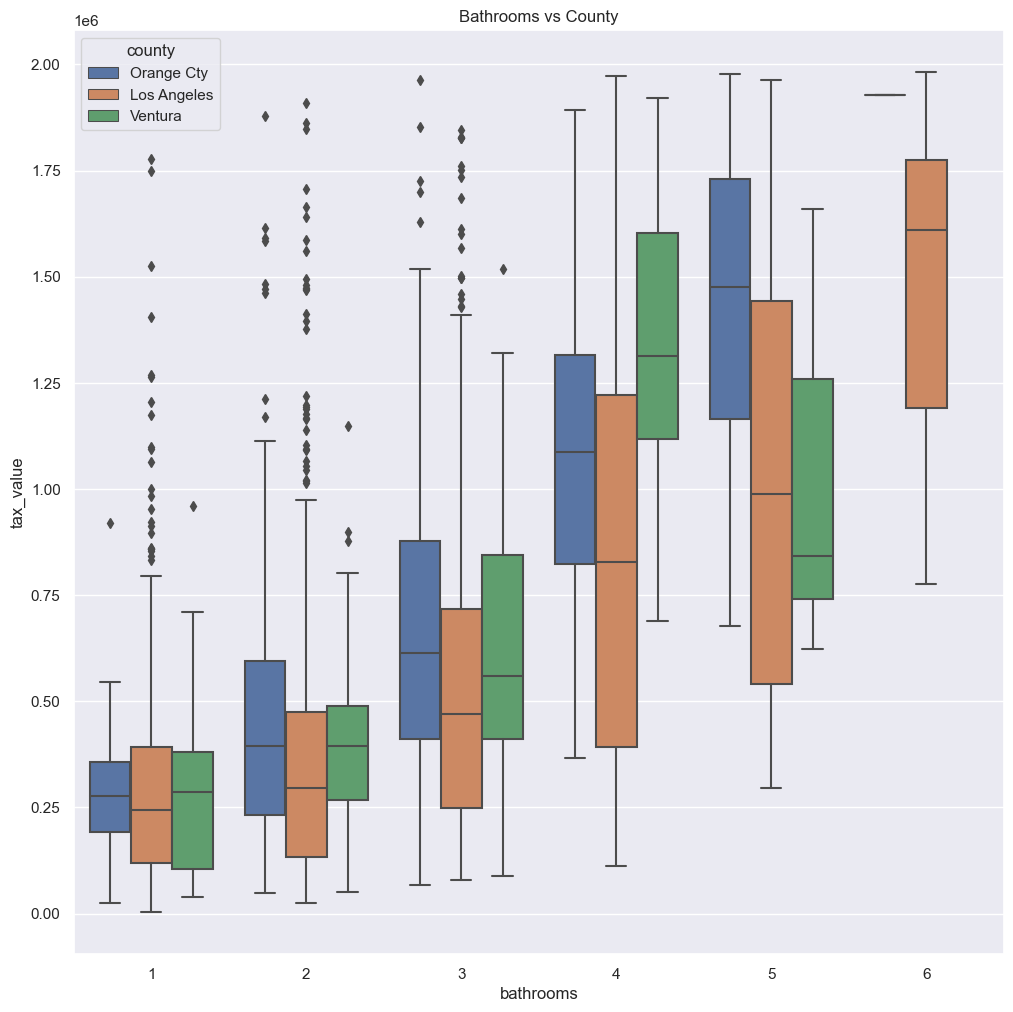

In [29]:
# Visual correlation between bathrooms and County tax values
e.bath_box(train)

In [44]:
# Pearson R used for statistical testing to verify visual assessment
e.bath_stat(train, validate, test)

train_r: 0.4745570274140469
train_p: 0.0
validate_r: 0.4856142672063031
validate_p: 0.0
The p-value is less than the alpha: True
Outcome: We reject the null


#### Bathroom Takeaways
<b>H0 = Number of Bathrooms has no relationship with of property tax value. Outcome: We reject the null hypothesis<b/>
- Ha = Number of Bathrooms has a relationship with property tax value

###   <div style="text-align: center;"><span style="color: green;"> 2. Is there a relationship between square feet and property tax value?

#### The scatter plot showcases the relationship between the square footage of SFH and the corresponding tax value, providing insights into the distribution across different counties.

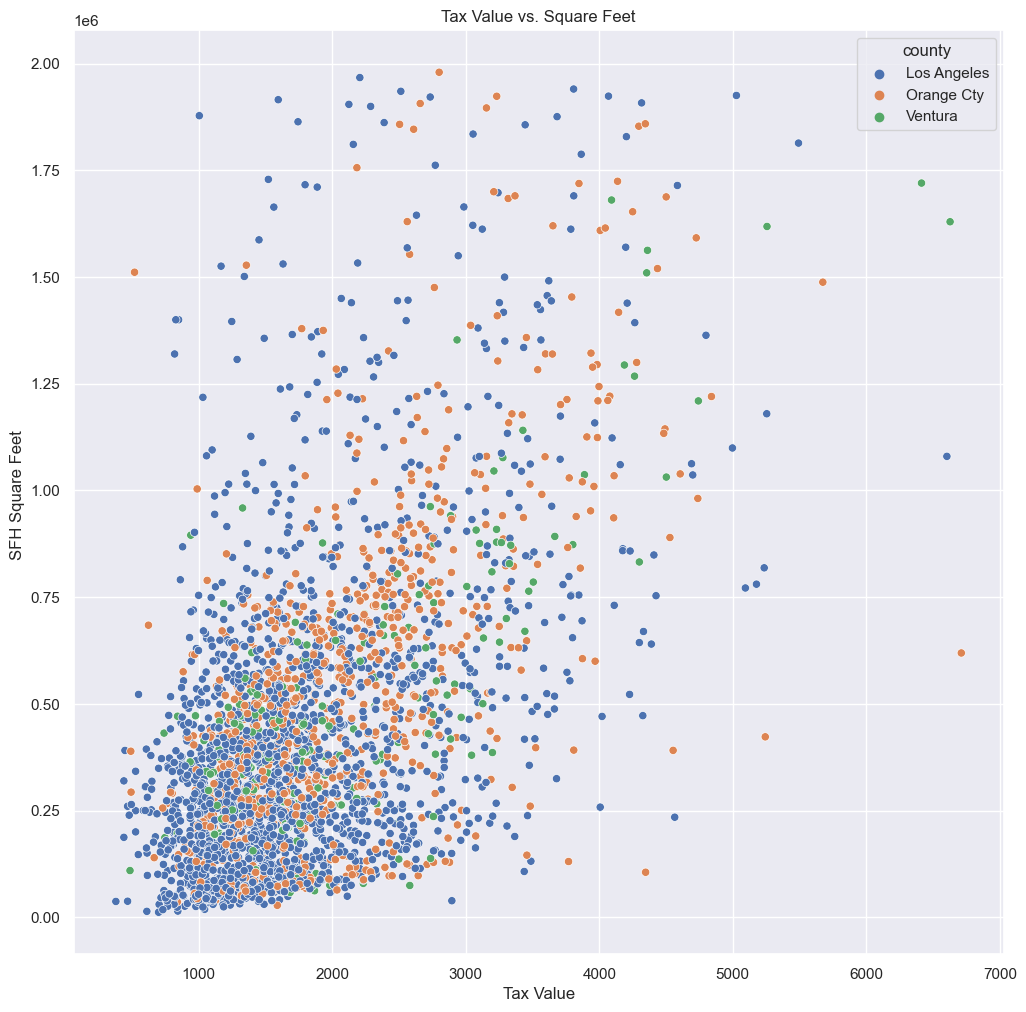

In [45]:
# Visual relationship between square feet and County tax values
e.sqft_scat(train)

In [46]:
#Spearman R statisting to verify 
e.sqft_stat(train, validate, test)

train_r: 0.49419918004592495
train_p: 0.0
validate_r: 0.49902037452225506
validate_p: 0.0
test_r: 0.4948076674975013
test_p: 0.0
The p-value is less than the alpha: True
Outcome: We reject the null


#### Square Feet Takeaways
<b>* H0 = Square Feet has no correlation with property tax value. Outcome: We will reject the Null Hypothesis.</b></b>
* Ha = Square Feet is correlated to property tax value


#### The bar chart shows the distribution of SFH bedrooms by county, highlighting the variation across different counties.

###  <div style="text-align: center;"><span style="color: green;"> 3. Does number of bedrooms have a relationship to property tax value?

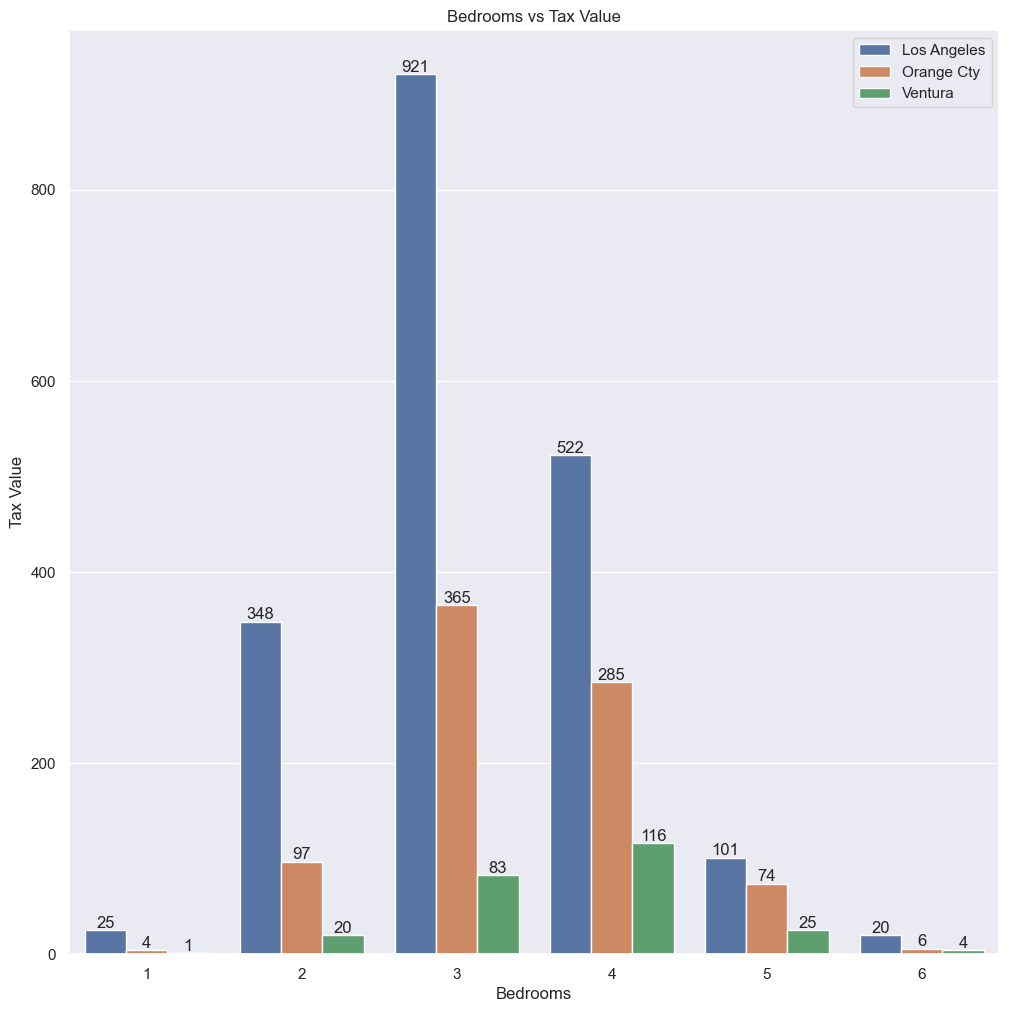

In [33]:
#Normal distribution of bedrooms compared to county
e.bed_in_bar(train)

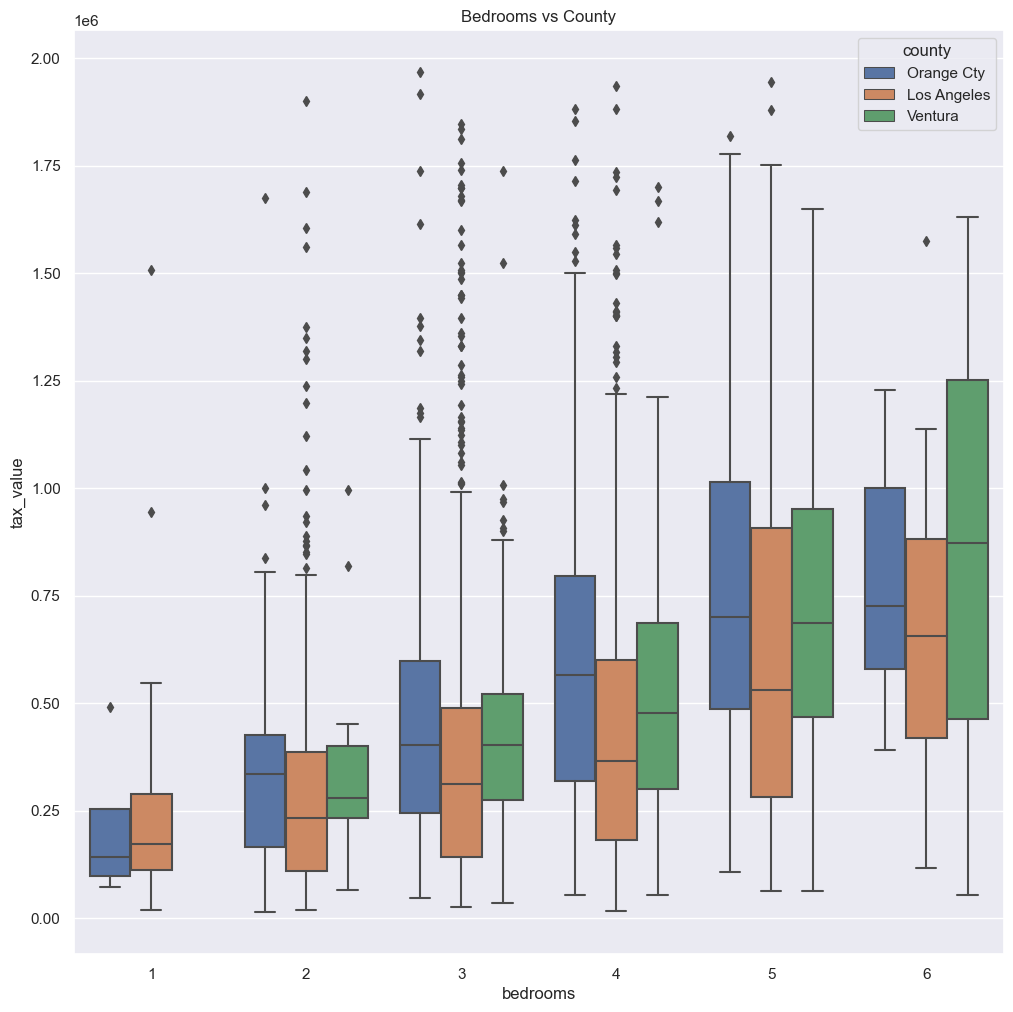

In [47]:
# Visual relationship between bedrooms and tax values
e.bed_in_box(train)

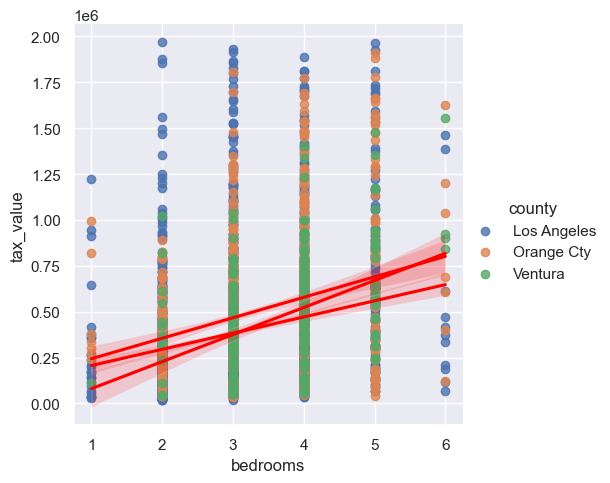

In [35]:
#Positive linear corelation between property tax value and bedrooms
e.plot_bed_pairs(train)

In [48]:
#Used Pearson R for stat test to confirm findings
e.bedrooms_stat(train, validate, test)

train_r: 0.2699128998891122
train_p: 0.0
validate_r: 0.27962186340959655
validate_p: 4.922614657529989e-180
The p-value is less than the alpha: True
Outcome: We reject the null


#### Bedrooms Takeaways
The correlation coefficients (r-values) for both the training and validation datasets indicate a positive relationship, with extremely small p-values. This suggests a significant correlation and supports the use of the Pearson R correlation test, indicating a somewhat normal distribution of the data.
<b>* H0 = Number of Bedrooms has no relationship with property tax value. Outcome: We reject the null
* Ha = Number of Bedrooms has a relationship with on property tax value


### <div style="text-align : center ;"> <span style="color:green"> 4. Does the Lot Size have a significant impact on property tax value?

#### The scatter plot highlights the relationship between the Lot Size of SFH and their corresponding tax values, offering insights into the distribution across different counties.

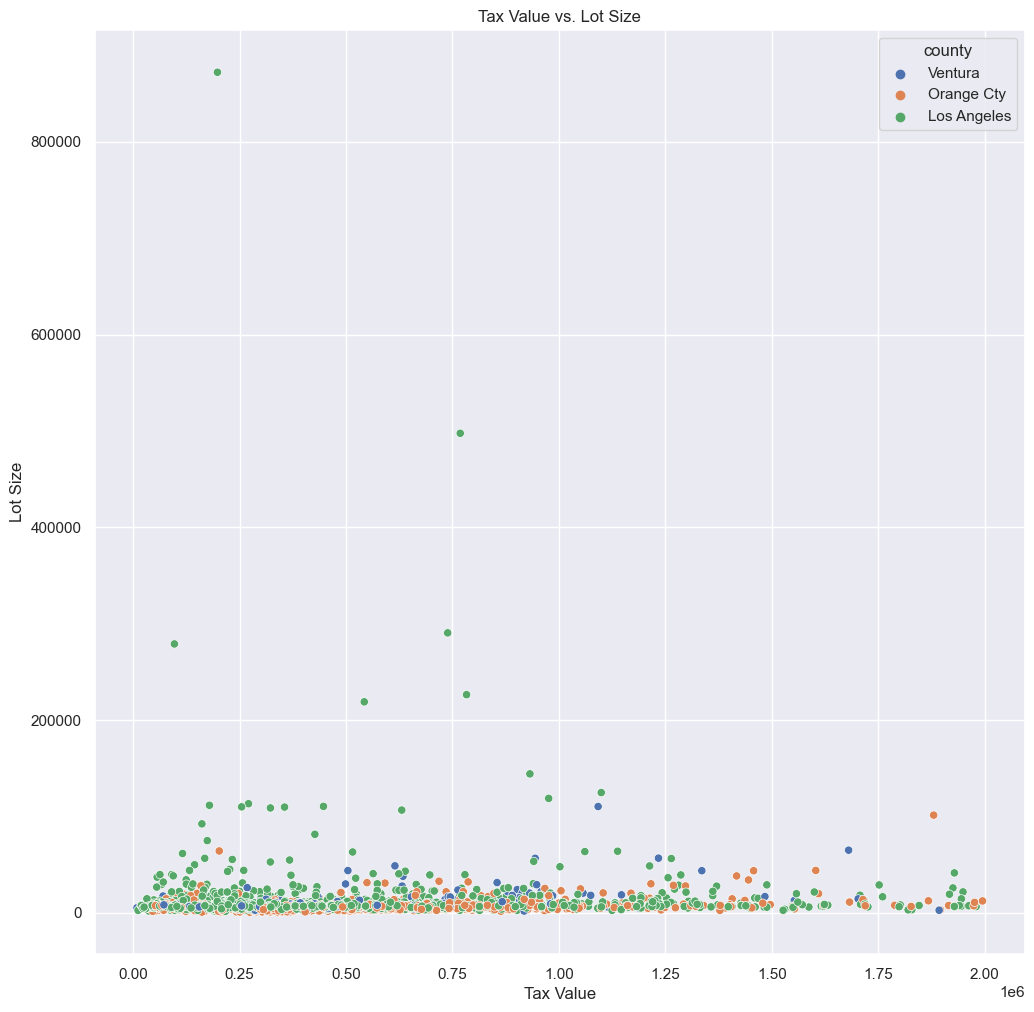

In [37]:
#Very extremely low if any signficant relations between tax Value and Lot Size
e.lot_scat(train)

In [50]:
#Spearman R used for statistical testing extremely low correlation positive between lot size and tax value. * inconsistent findings of both rejecting and accepting the null depending on sample. 
e.lot_stat(train, validate, test)


train_r: 0.11645097145550867
train_p: 1.427256484064407e-91
validate_r: 0.12435119508212768
validate_p: 5.98391137954606e-36
test_r: 0.1334695513970168
test_p: 3.363276715835308e-41
The p-value is less than the alpha: True
Outcome: We reject the null


#### Lot Size Takeaways
* <b> H0= Lot Size has no significant correlation with property tax value. Outcome: We reject the null</b>
* Ha= Lot Size is correlated  to property tax value

### EXPLORATION SUMMARRY
- Across the three different counties, all features exhibit a correlation/relationship with property tax value ranging from very weak to moderate.
- Among the features, square footage shows the strongest regression line.
- In Los Angeles County, there is a higher average of single-family homes (SFH) with 6+ bedrooms at a higher tax value and larger lot sizes.
- Bedrooms do not have a significant impact on property tax value compared to bathrooms. Interestingly, Ventura has few one-bedroom homes, while Orange County shows a comparable distribution to bedrooms and tax value.
- It may be worthwhile to create dummy variables to further investigate the differences between the counties in the dataset.
- The null hypotheses were rejected for the features of bedrooms, square feet, bathrooms, and lot size, indicating that there is evidence of a significant relationship between these features and the property tax value.

## <span style="color: green;"><u>MODELING</u></span>
I will use RMSE as an evaluation metric.
Baseline will be the mean of 'value'.


In [39]:
X_train, y_train, X_validate, y_validate, X_test, y_test = w.x_y_split(train, validate, test)
X_train.head(2)

,bedrooms,bathrooms,sqft,year_built,lot_size,longitude,latitude
2178,4,1,2499,1953,112751,-118169467,34635282
37565,4,1,1301,1944,5458,-118138053,33866686


In [40]:
y_train.mean(), y_train.median()

(444410.23812522786, 364079.0)

In [41]:
#Baseline
y_train, y_validate, metric_df = e.baseline(y_train, y_validate)


In [42]:
# Run the models and compare their metrics to identify the best performing one.
y_train, y_validate, metric_df = e.ols_lasso_tweedie(X_train, X_validate, y_train, y_validate, metric_df)

#Compare metrics
metric_df.head()

RMSE for OLS using LinearRegression
        Training/In-Sample:  275079.07 
        Validation/Out-of-Sample: 278281.75

RMSE for LassoLars
        Training/In-Sample:  275079.07 
        Validation/Out-of-Sample: 278281.75

RMSE for TweedieRegressor
        Training/In-Sample:  300810.78 
        Validation/Out-of-Sample: 303422.09



,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,352910.709119,356860.966132,0.000000
1,ols,275079.065774,278281.752714,0.391871
2,lasso_alpha0.03,275079.065774,278281.752684,0.391871
3,tweedie_power1_alpha1.0,300810.781304,303422.085967,0.328130


### LASSO + LARS MODEL SELECTED 

In [43]:
e.lasso_test_model(X_train, y_train, X_test, y_test)

RMSE for Lasso+Lars:
    _____________________________________________      
    Test Performance: 273153.02
    Test Explained Variance: 0.394
    Baseline: 444410.24


### MODEL SUMMARY
- OLS and Lasso+Lars models had the lowest train and validate RMSE of 275,079, 278,281 respectively, outperforming the baseline by approximately 22%.
- Tweedie regression achieved a consistent RMSE of around 300,810, improving by approximately 15% compared to the baseline of 352910.
- Considering the results, the Lasso+Lars model (alpha = 0.03) will be chosen for further analysis. Polynomial regression was not completed due to time constraints.
- LassoLars and OLS were the best performing models with a Test Performance RMSE of 273153 which was consistent with all datasets.


## <span style="color: green;"><u>CONCLUSION<u/></span>
This project aimed to develop a robust machine learning regression model for accurately forecasting the assessed values of single-family properties. The analysis encompassed three distinct counties and identified the following key findings:
- Square footage exhibited the most prominent correlation with property tax values.
- The number of bedrooms had a lesser impact on tax values compared to bathrooms.
- Los Angeles County showed a higher average of single-family homes with 6+ bedrooms, indicating higher tax values and larger lot sizes.
- The rejection of null hypotheses for bedrooms, square footage, bathrooms, and lot size highlighted their significant associations with property tax values. The top-performing models, OLS and Lasso+Lars, achieved superior results, surpassing the baseline, and justifying the selection of Lasso+Lars (alpha = 0.03) for further analysis.

## <span style="color: green;"><u>NEXT STEPS </u></span>
- Follow up with Polynomial Regression
- Make Dummy set to Split the data by counties and run three seperate models.
- Explore different features in dataset.


## <span style="color: green;"><u>RECOMMENDATION</u></span>
- Aggregate a minimum of three years of historical data to improve the accuracy of predictions.
- Utilize the Interquartile Range (IQR) approach during the data cleaning process to mitigate overfitting and account for the inherent skewness in the data.
- Incorporate the "bathbdcnt" column from the original zillow.csv dataset to eliminate redundancy and enhance the prediction model.
- Avoid using the "fireplace" and "basement" variables in the analysis due to a high number of null values, despite their notable correlations with tax value prediction.